In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime

In [214]:
url = 'https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5'

res = requests.get(url)
json = res.json()
data = json['result']['records']
raw = pd.DataFrame(data)
raw

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,IB,2393,IBERIA,2023-12-04T16:40:00,2023-12-04T16:33:00,A,BCN,BARCELONA,ברצלונה,BARCELONA,ספרד,SPAIN,3,None,None,LANDED,נחתה
1,2,LY,394,EL AL ISRAEL AIRLINES,2023-12-04T16:40:00,2023-12-04T16:33:00,A,BCN,BARCELONA,ברצלונה,BARCELONA,ספרד,SPAIN,3,None,None,LANDED,נחתה
2,3,LY,363,EL AL ISRAEL AIRLINES,2023-12-04T16:15:00,2023-12-04T16:34:00,D,VIE,VIENNA,וינה,VIENNA,אוסטריה,AUSTRIA,3,78-99,D,DEPARTED,המריאה
3,4,AM,7853,AERO MEXICO,2023-12-04T16:25:00,2023-12-04T16:37:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,78-99,D,DEPARTED,המריאה
4,5,LY,325,EL AL ISRAEL AIRLINES,2023-12-04T16:25:00,2023-12-04T16:37:00,D,CDG,PARIS-CHARLES DE GAULLE,פריס,PARIS,צרפת,FRANCE,3,78-99,D,DEPARTED,המריאה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,826,6H,044,ISRAIR AIRLINES,2023-12-08T15:30:00,2023-12-08T15:30:00,A,ETM,RAMON,אילת - רמון,RAMON,ישראל,ISRAEL,3,None,None,NOT FINAL,לא סופי
826,827,6H,882,ISRAIR AIRLINES,2023-12-08T15:30:00,2023-12-08T15:30:00,A,GYD,BAKU HEYDAR ALIYEV INT`L,באקו,BAKU,אזרביג'אן,AZERBAIJAN,3,None,None,NOT FINAL,לא סופי
827,828,6H,584,ISRAIR AIRLINES,2023-12-08T15:55:00,2023-12-08T15:55:00,A,LCA,LARNACA,לרנקה,LARNACA,קפריסין,CYPRUS,3,None,None,NOT FINAL,לא סופי
828,829,IZ,388,ARKIA ISRAELI AIRLINES,2023-12-08T16:00:00,2023-12-08T16:00:00,A,BEG,BELGRADE,בלגרד,BELGRADE,סרביה,SERBIA,3,None,None,NOT FINAL,לא סופי


In [215]:
cols = {
    'CHOPERD': 'airline',
    'CHOPER': 'airline_code',
    'CHPTOL': 'time',
    'CHAORD': 'kind',
    'CHLOC1TH': 'city',
    'CHLOC1CH': 'country',
    'CHRMINH': 'status'
}

df = pd.DataFrame()

for org, name in cols.items():
    df[name] = raw[org]

df['day'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').day)
df['month'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').month)
df['hour'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').hour)
df['minute'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S').minute)

df

,airline,airline_code,time,kind,city,country,status,day,month,hour,minute
0,IBERIA,IB,2023-12-04T16:33:00,A,ברצלונה,ספרד,נחתה,4,12,16,33
1,EL AL ISRAEL AIRLINES,LY,2023-12-04T16:33:00,A,ברצלונה,ספרד,נחתה,4,12,16,33
2,EL AL ISRAEL AIRLINES,LY,2023-12-04T16:34:00,D,וינה,אוסטריה,המריאה,4,12,16,34
3,AERO MEXICO,AM,2023-12-04T16:37:00,D,פריס,צרפת,המריאה,4,12,16,37
4,EL AL ISRAEL AIRLINES,LY,2023-12-04T16:37:00,D,פריס,צרפת,המריאה,4,12,16,37
...,...,...,...,...,...,...,...,...,...,...,...
825,ISRAIR AIRLINES,6H,2023-12-08T15:30:00,A,אילת - רמון,ישראל,לא סופי,8,12,15,30
826,ISRAIR AIRLINES,6H,2023-12-08T15:30:00,A,באקו,אזרביג'אן,לא סופי,8,12,15,30
827,ISRAIR AIRLINES,6H,2023-12-08T15:55:00,A,לרנקה,קפריסין,לא סופי,8,12,15,55
828,ARKIA ISRAELI AIRLINES,IZ,2023-12-08T16:00:00,A,בלגרד,סרביה,לא סופי,8,12,16,0


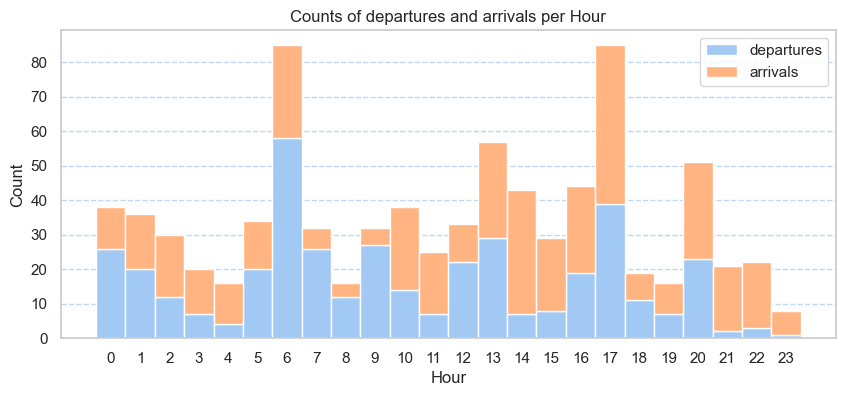

In [216]:
sns.set(style="whitegrid", palette="pastel")

hourly = df.groupby(['hour', 'kind']).size().unstack(fill_value=0)
hourly['arrivals'] = hourly['A']
hourly['departures'] = hourly['D']
hourly.drop(columns=['A','D'], inplace=True)

fig, ax = plt.subplots(figsize=(10,4))

bar_width = 1
index = hourly.index.unique()

ax.bar(index, hourly['departures'], label='departures', width=bar_width)
ax.bar(index, hourly['arrivals'], label='arrivals', width=bar_width, bottom=hourly['departures'])

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Counts of departures and arrivals per Hour')
plt.legend()

ax.yaxis.grid(True, linestyle='--', alpha=0.7, color=sns.color_palette('pastel')[0])
ax.xaxis.grid(False)


plt.xticks(index)
plt.show()

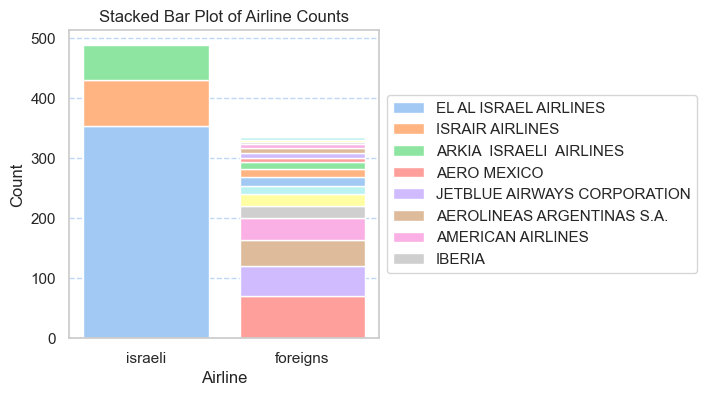

In [217]:
sns.set(style="whitegrid", palette="pastel")

aggs = {
    'airline': 'first',
    'status': 'count'
}

airlines = df.groupby('airline_code').agg(aggs)
airlines['count'] = airlines['status']

fig, ax = plt.subplots(figsize=(4,4))

width = 0.5

israeli_codes = ['LY', 'IZ', '6H']

bars = {
    'israeli': airlines[airlines.index.isin(israeli_codes)].sort_values('count', ascending=False),
    'foreigns': airlines[~airlines.index.isin(israeli_codes)].sort_values('count', ascending=False)
}
bars

for name, bar in bars.items():
    bottom = 0
    for (code, data) in bar.iterrows():
        label = data['airline'] if data['count'] >= 20 else ''
        ax.bar(name, data['count'], bottom=bottom, label=label)
        bottom += data['count']

plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of Airline Counts')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.yaxis.grid(True, linestyle='--', alpha=0.7, color=sns.color_palette('pastel')[0])
ax.xaxis.grid(False)
